In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv("mobile_price_data.csv")

In [4]:
df1.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [5]:
df = df1.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [7]:
#first lets clean the target column i.e: mobile_price
df["mobile_price"] = df["mobile_price"].str.replace("₹","")
df["mobile_price"] = df["mobile_price"].str.replace(",","")

In [8]:
#checking the columns by taking random 3 data 
df["mobile_price"].sample(3)

444     9500
38     29999
88     16999
Name: mobile_price, dtype: object

In [9]:
df.columns

Index(['mobile_name', 'mobile_price', 'mobile_color', 'dual_sim', 'disp_size',
       'resolution', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram',
       'p_cam', 'f_cam', 'network', 'bluetooth', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight'],
      dtype='object')

In [10]:
#lets make a list of features that seems to have categorical data
l = ['mobile_color', 'dual_sim', 'disp_size', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram','p_cam', 'f_cam', 'network', 'bluetooth']

In [11]:
for v in l:
    print(f"{v}:")
    print(f"{df[v].value_counts()}")
    print("____________________________________")

mobile_color:
Black              28
Red                20
Gold               19
Blue               14
Rose Gold          10
                   ..
Emerald Green       1
Forest Green        1
Charcoal Blue       1
Moonlight White     1
Twilight Purple     1
Name: mobile_color, Length: 165, dtype: int64
____________________________________
dual_sim:
Dual Sim      458
Single Sim      1
Name: dual_sim, dtype: int64
____________________________________
disp_size:
16.51 cm (6.5 inch)      51
15.8 cm (6.22 inch)      50
16.0 cm (6.3 inch)       38
15.21 cm (5.99 inch)     35
16.94 cm (6.67 inch)     33
16.26 cm (6.4 inch)      24
16.59 cm (6.53 inch)     21
15.75 cm (6.2 inch)      21
16.23 cm (6.39 inch)     17
16.13 cm (6.35 inch)     14
16.76 cm (6.6 inch)      14
16.21 cm (6.38 inch)     12
13.97 cm (5.5 inch)      12
15.7 cm (6.18 inch)      11
15.49 cm (6.1 inch)      11
16.36 cm (6.44 inch)     11
14.48 cm (5.7 inch)      10
16.56 cm (6.52 inch)      8
14.35 cm (5.65 inch)      7
16.69 

In [12]:
df.shape

(459, 20)

In [13]:
#blutooth columns has only one data so lets drop it
df.drop("bluetooth",axis = 1,inplace = True)

In [14]:
#as we can see from the count that there is a single sim phone so lets check that out 
df[df["dual_sim"] == "Single Sim"]

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
108,"MI3 (Metallic Grey, 16 GB)",13999,Metallic Grey,Single Sim,12.7 cm (5 inch),1920 x 1080 Pixels,Android KitKat 4.4.2,Quad Core,2.3 GHz,16 GB,2 GB,13MP Rear Camera,2MP Front Camera,3G,3050 mAh,73.6 mm,144 mm,8.1 mm,145 g


In [15]:
# droping the dual_sim columns as it will not play any significant role in predicting the price.
df.drop("dual_sim",axis= 1,inplace= True)

In [16]:
#check the shape of the dataframe after deleting the bluetooth and dual sim columns
df.shape

(459, 18)

In [17]:
#from our value counts we can see that there is a mobile with ram 1gb so lets check that out
# for more specifications
df[df["ram"] == "1 GB"]

,mobile_name,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
149,"Redmi Go (Blue, 16 GB)",6700,Blue,12.7 cm (5 inch),1280 x 720 pixels,Android Oreo 8.1,Quad Core,1.4 GHz,16 GB,1 GB,8MP Rear Camera,5MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3000 mAh,70.1 mm,140.4 mm,8.35 mm,137 g
177,"Redmi Go (Blue, 16 GB)",6700,Blue,12.7 cm (5 inch),1280 x 720 pixels,Android Oreo 8.1,Quad Core,1.4 GHz,16 GB,1 GB,8MP Rear Camera,5MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3000 mAh,70.1 mm,140.4 mm,8.35 mm,137 g
298,"Samsung Galaxy J2 Core (Black, 16 GB)",6299,Black,12.7 cm (5 inch),960 x 540 Pixels,Android Oreo 8.1,Quad Core,1.4 GHz,16 GB,1 GB,8MP Rear Camera,5MP Front Camera,"4G, 3G, 2G",2600 mAh,72.1 mm,143.4 mm,8.95 mm,154 g
302,"Samsung Galaxy J2-2017 (Metallic gold, 8 GB)",6000,Metallic gold,11.94 cm (4.7 inch),540 x 960 Pixels,Android Lollipop 5.4.1,Quad Core,1.3 GHz,8 GB,1 GB,5MP Rear Camera,2MP Front Camera,"3G, 4G, 2G",2000 mAh,69 mm,136.5 mm,8.4 mm,130 g


In [18]:
df[df["num_cores"] == "Single Core"]

,mobile_name,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
435,"OPPO F1S (Grey, 32 GB)",11990,Grey,13.97 cm (5.5 inch),720 x 1280,Android Lollipop 5.1.1,Single Core,1.5 GHz,32 GB,3 GB,13MP Rear Camera,16MP Front Camera,4G VOLTE,3075 mAh,154.5 mm,7.38 mm,76 mm,160 g


In [19]:
#there are some columns that have clear int value 
# so lets clean those columns and convert them to float or int
l = ["mp_speed","int_memory","ram","battery_power","mob_width","mob_height","mob_depth","mob_weight"]

for i in l:
    df[i] = df[i].str.replace("[a-zA-Z]","",regex=True)

In [20]:
df.head(3)

,mobile_name,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195


In [21]:
#now lets convert the columns: float type to float and int type to int
df[["int_memory","ram","battery_power","mobile_price"]] = df[["int_memory","ram","battery_power","mobile_price"]].astype("int")
df[["mp_speed","mob_width","mob_height","mob_depth","mob_weight"]] = df[["mp_speed","mob_width","mob_height","mob_depth","mob_weight"]].astype("float")

In [22]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    459 non-null    object 
 1   mobile_price   459 non-null    int32  
 2   mobile_color   459 non-null    object 
 3   disp_size      459 non-null    object 
 4   resolution     459 non-null    object 
 5   os             459 non-null    object 
 6   num_cores      459 non-null    object 
 7   mp_speed       459 non-null    float64
 8   int_memory     459 non-null    int32  
 9   ram            459 non-null    int32  
 10  p_cam          459 non-null    object 
 11  f_cam          459 non-null    object 
 12  network        459 non-null    object 
 13  battery_power  459 non-null    int32  
 14  mob_width      459 non-null    float64
 15  mob_height     459 non-null    float64
 16  mob_depth      459 non-null    float64
 17  mob_weight     459 non-null    float64
dtypes: float64

In [23]:
#lets convert the disp size in cm or iches,
#but as the disp size is already defined we just need to extract and coonvert
df["disp_size_cm"] = df['disp_size'].str.replace(' cm .*',"",regex = True)

In [24]:
df.head(3)

,mobile_name,mobile_price,mobile_color,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56


In [25]:
df.drop("disp_size",axis = 1,inplace = True)

In [26]:
df["disp_size_cm"] = df['disp_size_cm'].astype("float")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    459 non-null    object 
 1   mobile_price   459 non-null    int32  
 2   mobile_color   459 non-null    object 
 3   resolution     459 non-null    object 
 4   os             459 non-null    object 
 5   num_cores      459 non-null    object 
 6   mp_speed       459 non-null    float64
 7   int_memory     459 non-null    int32  
 8   ram            459 non-null    int32  
 9   p_cam          459 non-null    object 
 10  f_cam          459 non-null    object 
 11  network        459 non-null    object 
 12  battery_power  459 non-null    int32  
 13  mob_width      459 non-null    float64
 14  mob_height     459 non-null    float64
 15  mob_depth      459 non-null    float64
 16  mob_weight     459 non-null    float64
 17  disp_size_cm   459 non-null    float64
dtypes: float64

In [28]:
#chekcing the num_cores columns
df["num_cores"].value_counts()

Octa Core      444
Quad Core       14
Single Core      1
Name: num_cores, dtype: int64

In [29]:
#checking the other spec for the mobile wth number of cores = single
df[df["num_cores"] == "Single Core"]

,mobile_name,mobile_price,mobile_color,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm
435,"OPPO F1S (Grey, 32 GB)",11990,Grey,720 x 1280,Android Lollipop 5.1.1,Single Core,1.5,32,3,13MP Rear Camera,16MP Front Camera,4G VOLTE,3075,154.5,7.38,76.0,160.0,13.97


In [30]:
df.drop((df[df["num_cores"] == "Single Core"]).index,inplace=True)

In [31]:
df["num_cores"].value_counts()

Octa Core    444
Quad Core     14
Name: num_cores, dtype: int64

In [32]:
#dictionary with num of core values
d = {"Octa Core": 8,"Quad Core": 4}

In [33]:
#applying the dictionary to the column values
df["core"] = df["num_cores"].apply(lambda x: d[x])

In [34]:
df["core"].value_counts()

8    444
4     14
Name: core, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 458
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    458 non-null    object 
 1   mobile_price   458 non-null    int32  
 2   mobile_color   458 non-null    object 
 3   resolution     458 non-null    object 
 4   os             458 non-null    object 
 5   num_cores      458 non-null    object 
 6   mp_speed       458 non-null    float64
 7   int_memory     458 non-null    int32  
 8   ram            458 non-null    int32  
 9   p_cam          458 non-null    object 
 10  f_cam          458 non-null    object 
 11  network        458 non-null    object 
 12  battery_power  458 non-null    int32  
 13  mob_width      458 non-null    float64
 14  mob_height     458 non-null    float64
 15  mob_depth      458 non-null    float64
 16  mob_weight     458 non-null    float64
 17  disp_size_cm   458 non-null    float64
 18  core      

In [36]:
#droping the num_core col
df.drop("num_cores",axis=1,inplace=True)

In [37]:
#extracting the Brand names form mobile name columns
df["brand"] = df["mobile_name"].str.replace(' .*',"",regex=True)

In [38]:
df["brand"].value_counts()

Vivo       96
Redmi      93
OPPO       85
Realme     79
Infinix    36
POCO       31
Mi         20
Samsung    17
MI3         1
Name: brand, dtype: int64

In [39]:
#the mobile name columns is not of any significance so removing it
df.drop("mobile_name",axis = 1,inplace = True)

In [40]:
df.head(3)

,mobile_price,mobile_color,resolution,os,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,brand
0,8999,So White,1600 x 720 Pixels,Android 10,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,Realme
1,8999,So Blue,1600 x 720 Pixels,Android 10,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,Realme
2,9999,So Blue,1600 x 720 Pixels,Android 10,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,Realme


In [41]:
df["mobile_color"].nunique()

165

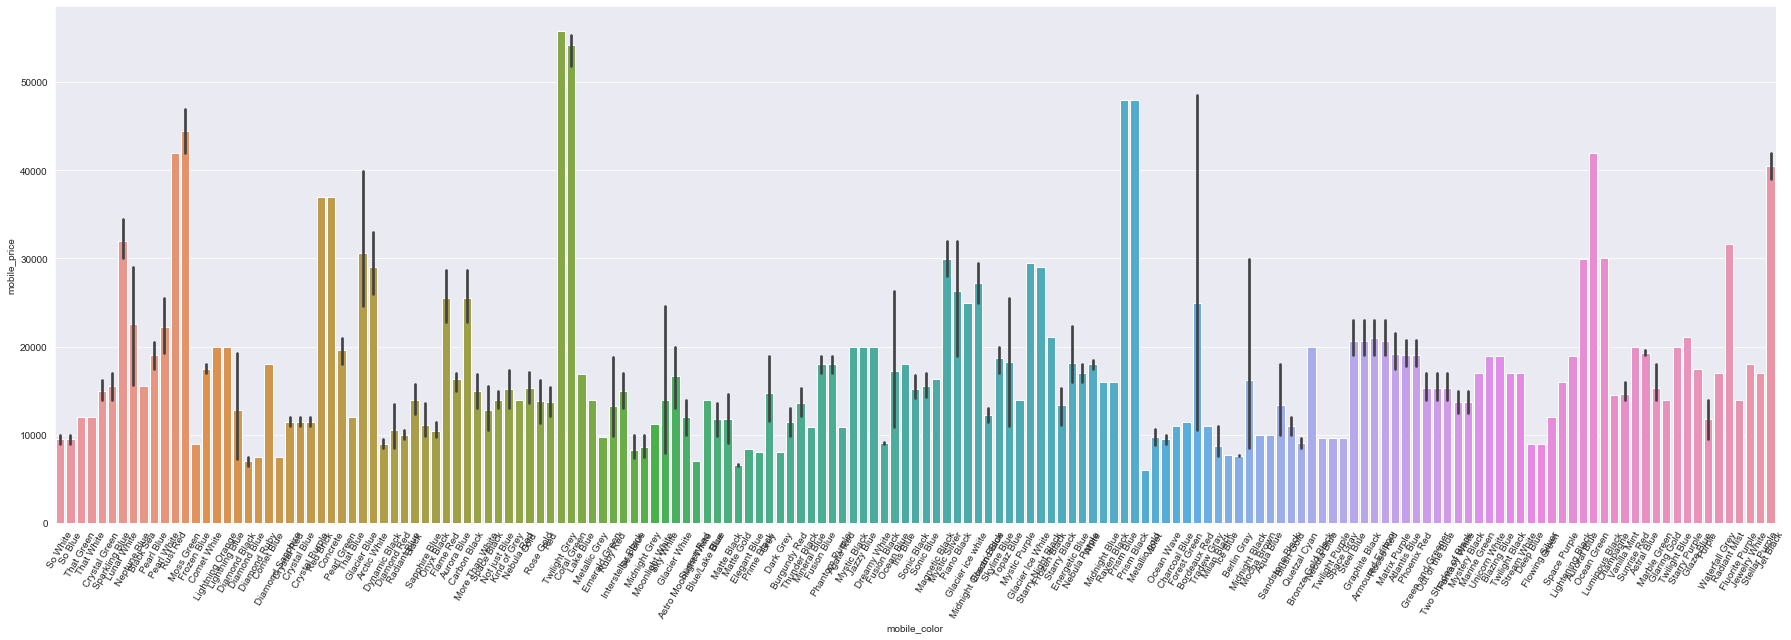

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,9))
sns.barplot(data=df,x="mobile_color",y="mobile_price")
plt.xticks(rotation=60)
plt.tight_layout()

In [43]:
#arranging the columns for better understanding
new = [ 'brand','mobile_color', 'resolution', 'os', 'p_cam', 'f_cam', 'network', 'battery_power','mob_width', 'mob_height', 'mob_depth', 'mob_weight', 'disp_size_cm','core','mobile_price', 'mp_speed','int_memory', 'ram',]

In [44]:
df = df[new]

In [45]:
df.head(2)

,brand,mobile_color,resolution,os,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,mobile_price,mp_speed,int_memory,ram
0,Realme,So White,1600 x 720 Pixels,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3
1,Realme,So Blue,1600 x 720 Pixels,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          458 non-null    object 
 1   mobile_color   458 non-null    object 
 2   resolution     458 non-null    object 
 3   os             458 non-null    object 
 4   p_cam          458 non-null    object 
 5   f_cam          458 non-null    object 
 6   network        458 non-null    object 
 7   battery_power  458 non-null    int32  
 8   mob_width      458 non-null    float64
 9   mob_height     458 non-null    float64
 10  mob_depth      458 non-null    float64
 11  mob_weight     458 non-null    float64
 12  disp_size_cm   458 non-null    float64
 13  core           458 non-null    int64  
 14  mobile_price   458 non-null    int32  
 15  mp_speed       458 non-null    float64
 16  int_memory     458 non-null    int32  
 17  ram            458 non-null    int32  
dtypes: float64

In [47]:
#lets see the brand name ones more
df["brand"].unique()  # here we can see a brand named "MI3" which is mis spelled 

array(['Realme', 'Redmi', 'Mi', 'MI3', 'Vivo', 'Samsung', 'Infinix',
       'POCO', 'OPPO'], dtype=object)

In [48]:
#correcting the misspelling
df["brand"] = df["brand"].str.replace("MI3","Mi")

In [49]:
#look at the unique values and the value counts for correction
df["brand"].value_counts()

Vivo       96
Redmi      93
OPPO       85
Realme     79
Infinix    36
POCO       31
Mi         21
Samsung    17
Name: brand, dtype: int64

### the columns transformation till now will help in better exploratory data analysis. 

In [50]:
#EDA

In [51]:
#lets start with numerical columns and check out their distribution
n_features = ['battery_power', 'mob_width', 'mob_height', 'mob_depth','mob_weight', 'disp_size_cm']

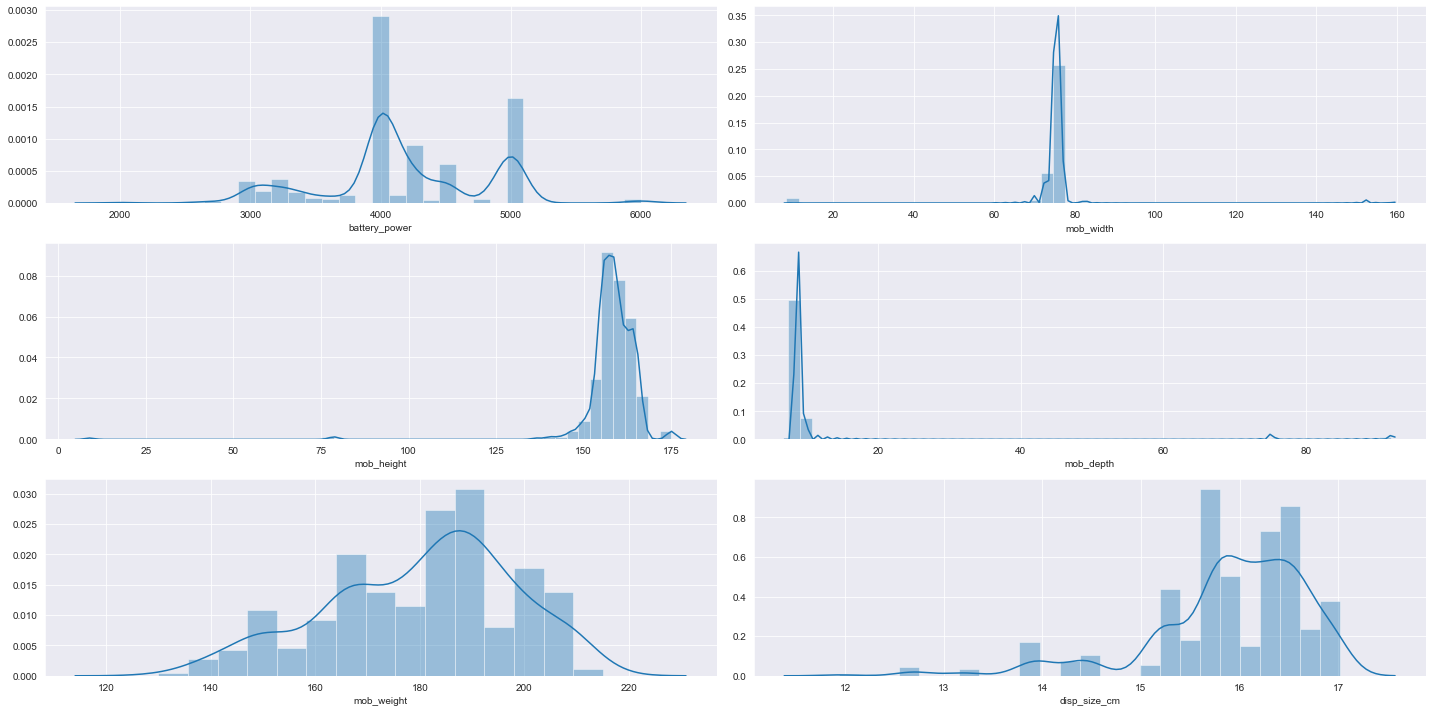

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
for i,f in enumerate(n_features,1):
    plt.subplot(3,2,i)
    sns.distplot(df[f])  
    plt.tight_layout()

In [53]:
n_features = ['battery_power', 'mob_width', 'mob_height', 'mob_depth','mob_weight', 'disp_size_cm']

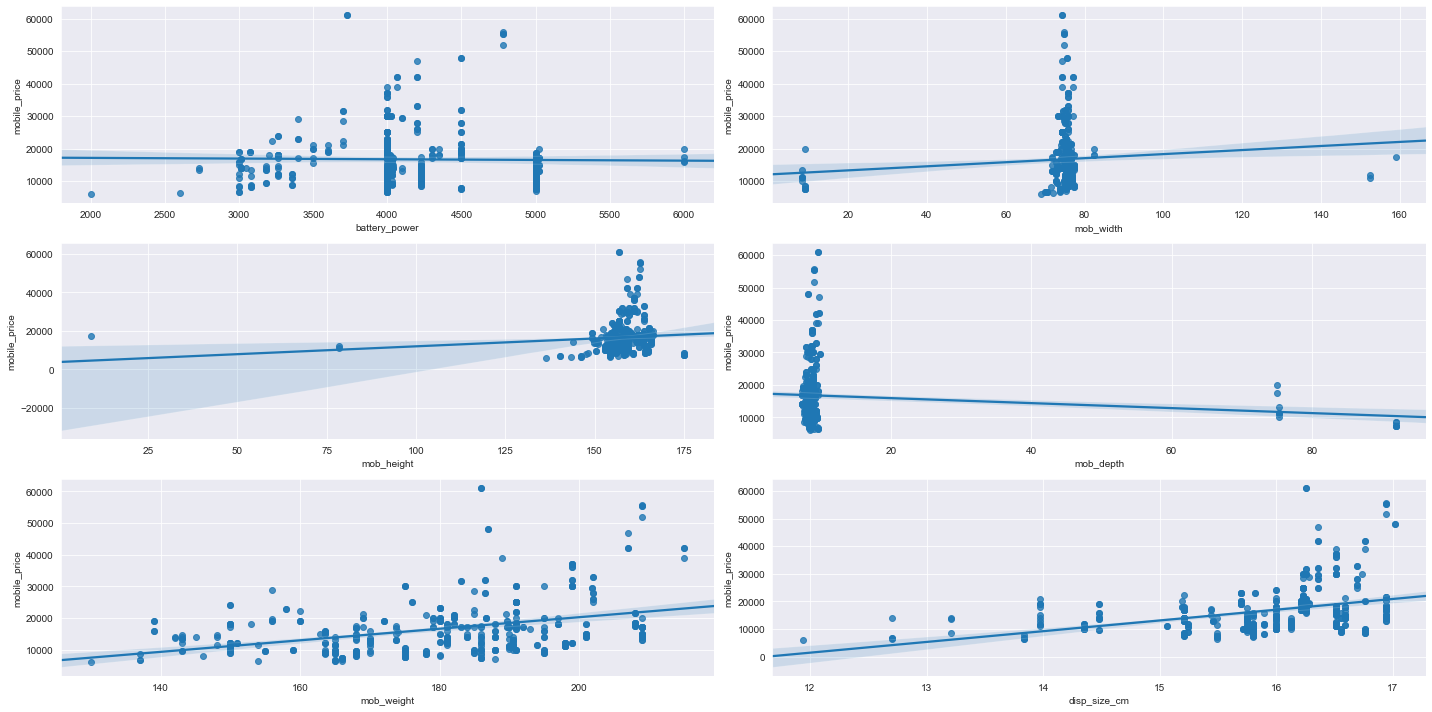

In [54]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
for i,f in enumerate(n_features,1):
    plt.subplot(3,2,i)
    sns.regplot(data = df,x = f,y="mobile_price")  
    plt.tight_layout()

From the above scatter plots we can see our data has some outliers.
eliminating them will be better for our model

In [55]:
#eliminating outliers from mob_width col
df.drop((df[(df["mob_width"]<20) | (df["mob_width"]>140)]).index,inplace = True)

In [56]:
#eliminating outliers from mob_height col
df.drop((df[df["mob_height"]<125]).index,inplace=True)

In [57]:
#eliminating outliers from mob_depth col
df.drop((df[df["mob_depth"]>60]).index,inplace = True)

In [58]:
#eliminating outliers from battery_power col
df.drop((df[(df["battery_power"]<3000) | (df["battery_power"]>5500)]).index,inplace = True)

checking the scatter plots again

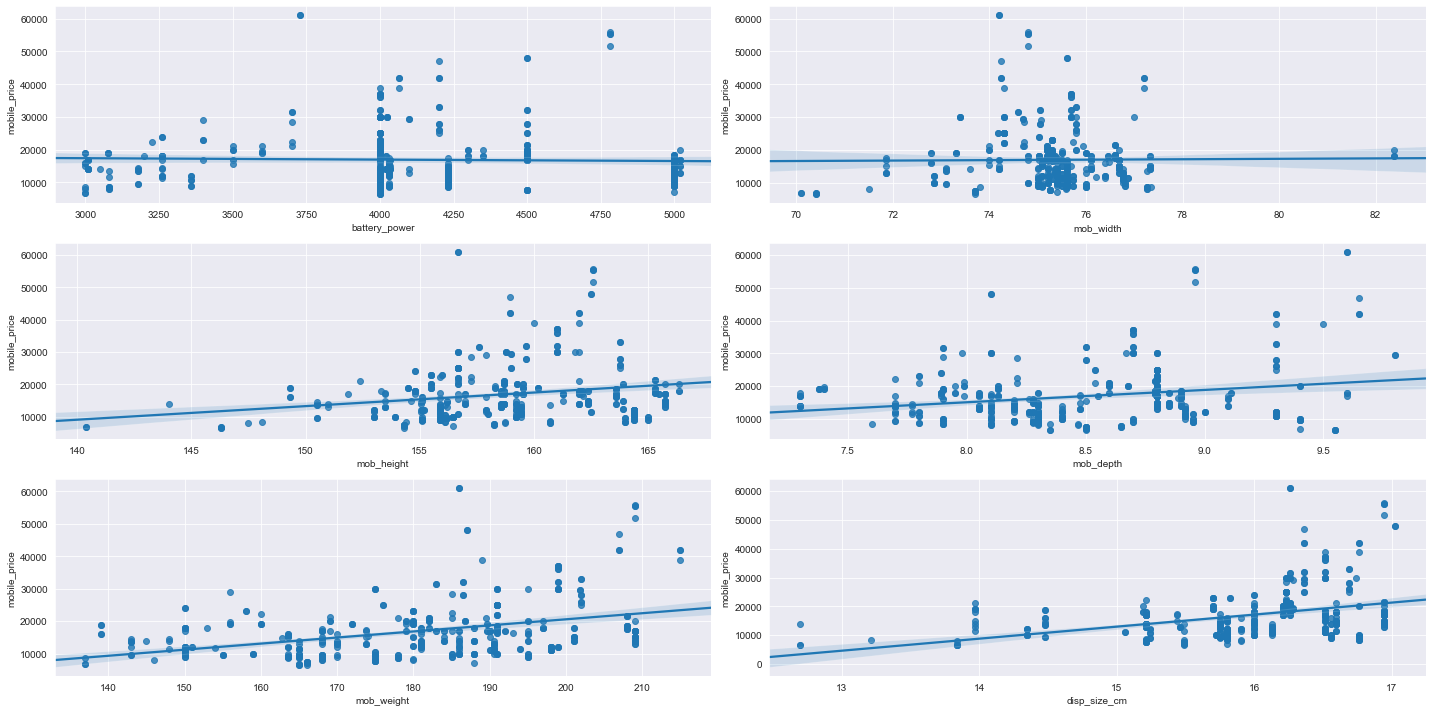

In [59]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
for i,f in enumerate(n_features,1):
    plt.subplot(3,2,i)
    sns.regplot(data = df,x = f,y="mobile_price")  
    plt.tight_layout()

Now, we can see that battery_power and mob_width share a neutral corelation, and mob_height, mob_depth, mob_weight, and disp_size have positive corelation with the price column.

In [60]:
#slicing and storing the numerical into temporary dataframe
temp = df.iloc[:,7:]

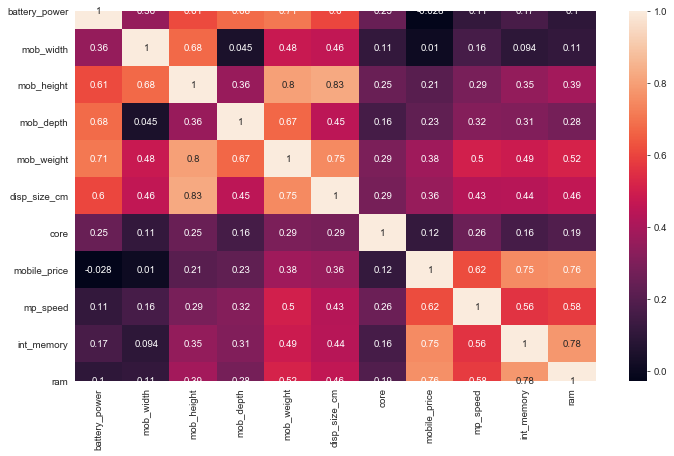

In [61]:
#heatmap to check the corelation between all the num varibales
plt.figure(figsize=(12,7),dpi=70)
sns.heatmap(temp.corr(),annot=True)

In [62]:
#sorting and storing all the corelation only corrosponding the mobile price column
s = temp.corr()["mobile_price"].sort_values()[:-1]

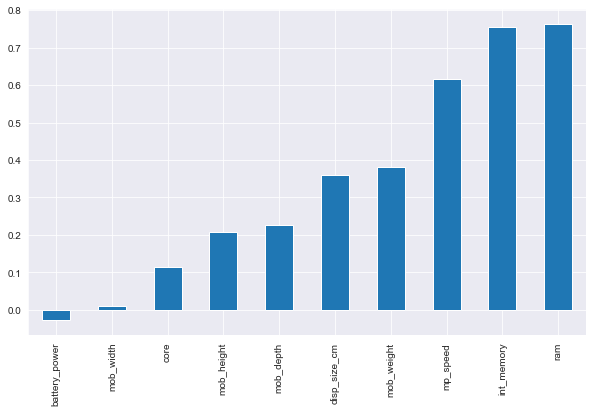

In [63]:
#ploting the sorted corelation
s.plot(kind = "bar",figsize = (10,6))

we can see that mob_width, core, mob_height, mob_depth does not any significance effect on mobile price so we can drop these col and chek our model performance.

In [64]:
df.head(3)

,brand,mobile_color,resolution,os,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,mobile_price,mp_speed,int_memory,ram
0,Realme,So White,1600 x 720 Pixels,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3
1,Realme,So Blue,1600 x 720 Pixels,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3
2,Realme,So Blue,1600 x 720 Pixels,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,9999,2.0,64,4


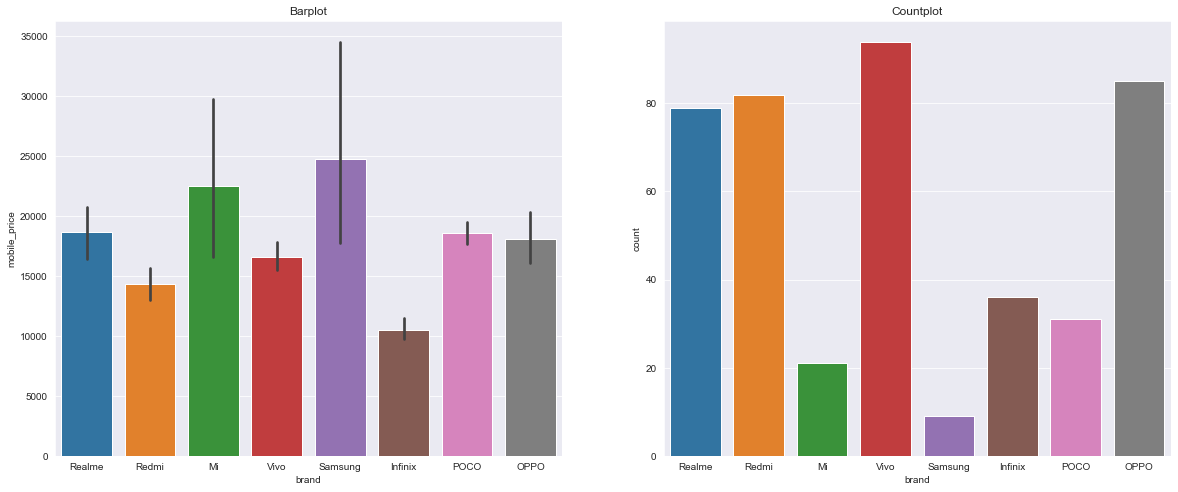

In [65]:
#price distribution per brand
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Barplot")
sns.barplot(data=df,x="brand",y="mobile_price")
plt.subplot(1,2,2)
plt.title("Countplot")
sns.countplot(data=df,x="brand")

In [66]:
#got and error on the first attempt as some rows contain special symbols
#checking the data
df["resolution"].unique()
#some rows contain $ symbol

array(['1600 x 720 Pixels', '2340 x 1080 pixels', '2400 x 1080 Pixels',
       '1080 x 2340 Pixels', '1080 x 2400 Pixels', '720 x 1600 Pixels',
       '1560 x 720 pixels', '2400 × 1080 Pixels', '1520 x 720 pixels',
       '1520 x 720 Pixels', '2400 x 1080 pixel', '1560 x 720 Pixels',
       '2160 x 1080 Pixels', '1440 x 720 pixels', '2280 x 1080 pixels',
       '2160 x 1080 pixels', '2340 x 1080 Pixel', '1920 x 1080 Pixels',
       '1920 x 1080 pixels', '2400 x 1080 Pixel', '1280 x 720 pixels',
       '1520 x 720$$pixel', '2400 x 1080$$pixel', '1280 x 720 Pixels',
       '720 x 1544 pixels', '720 x 1544 Pixels', '2340 x 1080 Pixels',
       '2316 x 1080 pixels', '2280 x 1080 Pixels', '1440 x 720 Pixels',
       '1440 x 720 Pixel', '1520 x 720$$ pixels', '1520 x 720$pixels',
       '1080 x 2160 pixels', '1500 x 720 pixels', '720 x 1440 Pixels',
       '720*1440 Pixels', '1080 x 1920 Pixels', '720 x 1520 pixels',
       '1080 x 2340 pixels', '720 x 1560 pixels'], dtype=object)

In [67]:
#cleaning the $ symbol 
df["resolution"] = df["resolution"].str.replace("$","")

In [68]:
df["resolution"] = df["resolution"].str.replace("*"," x ")

In [69]:
df["resolution"].unique()

array(['1600 x 720 Pixels', '2340 x 1080 pixels', '2400 x 1080 Pixels',
       '1080 x 2340 Pixels', '1080 x 2400 Pixels', '720 x 1600 Pixels',
       '1560 x 720 pixels', '2400 × 1080 Pixels', '1520 x 720 pixels',
       '1520 x 720 Pixels', '2400 x 1080 pixel', '1560 x 720 Pixels',
       '2160 x 1080 Pixels', '1440 x 720 pixels', '2280 x 1080 pixels',
       '2160 x 1080 pixels', '2340 x 1080 Pixel', '1920 x 1080 Pixels',
       '1920 x 1080 pixels', '2400 x 1080 Pixel', '1280 x 720 pixels',
       '1520 x 720pixel', '2400 x 1080pixel', '1280 x 720 Pixels',
       '720 x 1544 pixels', '720 x 1544 Pixels', '2340 x 1080 Pixels',
       '2316 x 1080 pixels', '2280 x 1080 Pixels', '1440 x 720 Pixels',
       '1440 x 720 Pixel', '1520 x 720pixels', '1080 x 2160 pixels',
       '1500 x 720 pixels', '720 x 1440 Pixels', '1080 x 1920 Pixels',
       '720 x 1520 pixels', '1080 x 2340 pixels', '720 x 1560 pixels'],
      dtype=object)

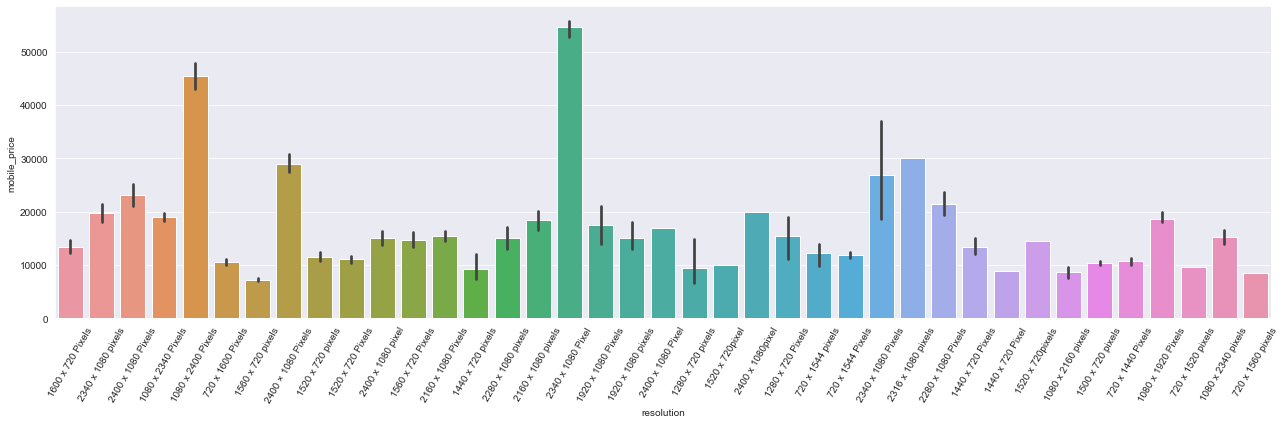

In [70]:
#barplot of resolution and price
plt.figure(figsize=(18,6))
sns.barplot(data=df,x="resolution",y="mobile_price")
plt.xticks(rotation=60)
plt.tight_layout()

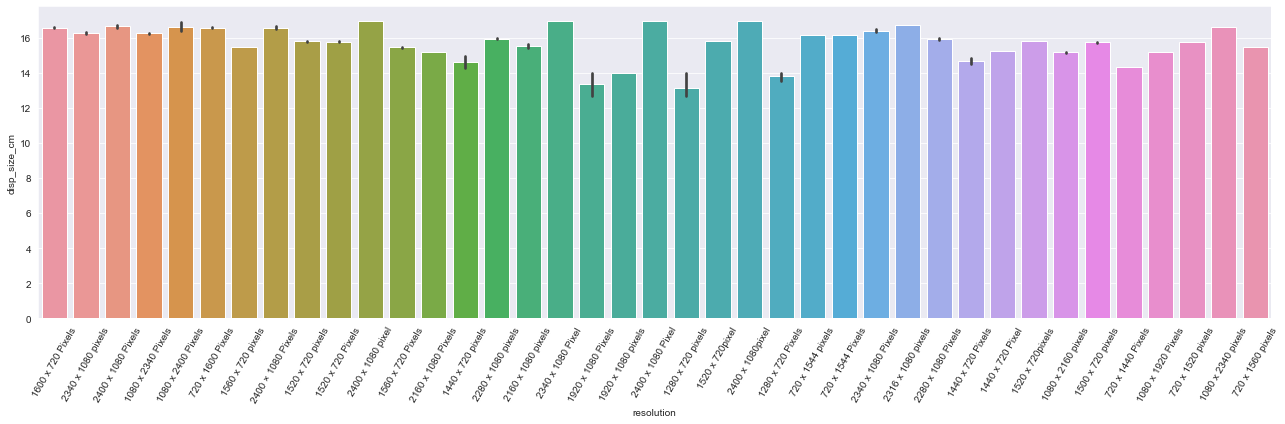

In [71]:
#lets check the relation between the resolution and display size
plt.figure(figsize=(18,6))
sns.barplot(data=df,x="resolution",y="disp_size_cm")
plt.xticks(rotation=60)
plt.tight_layout()

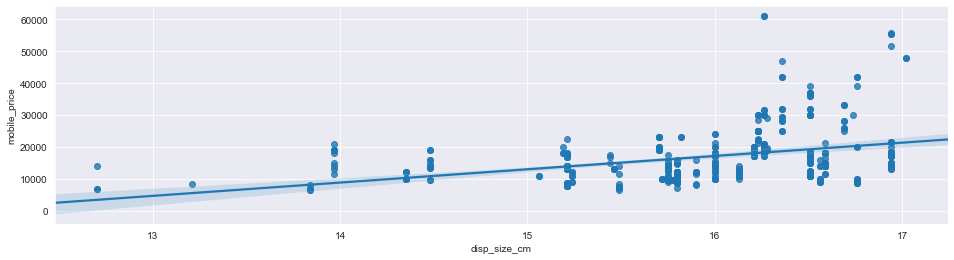

In [72]:
#scatter plot of display size and mobile prize
plt.figure(figsize=(16,4))
sns.regplot(data=df,x="disp_size_cm",y="mobile_price")

From the above three plots:
1 - resolution does have some significant role for a mobile price. 
2 - resoltion and display size have very good relation with each other.
3 - display size and mobile price have a linear relation with each other.
so we can say that both the features will have the almost the same impact on our model.
i'll keep the display size column, as numercal columns it will have a better impact on our model.

In [73]:
#droping the resolution column
df.drop("resolution",axis = 1,inplace = True)

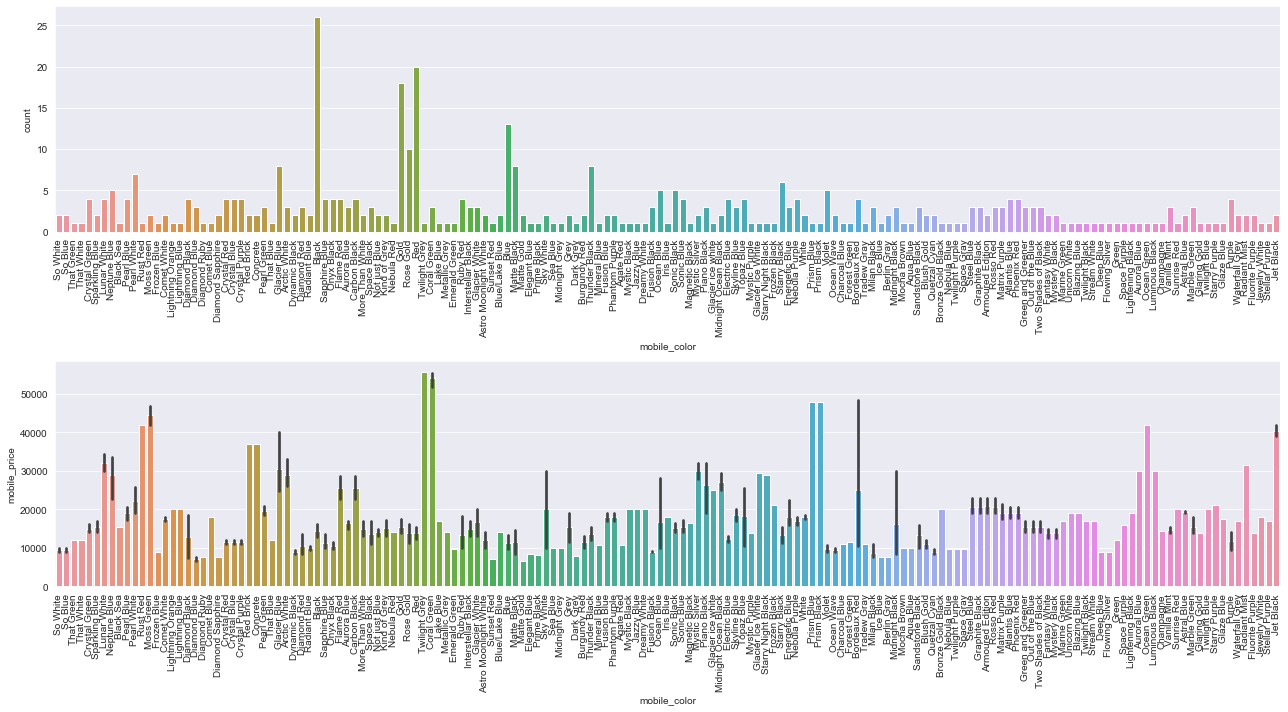

In [74]:
#checking the mobile color column
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
sns.countplot(data=df,x="mobile_color")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(data=df,x="mobile_color",y="mobile_price")
plt.xticks(rotation=90)
plt.tight_layout()

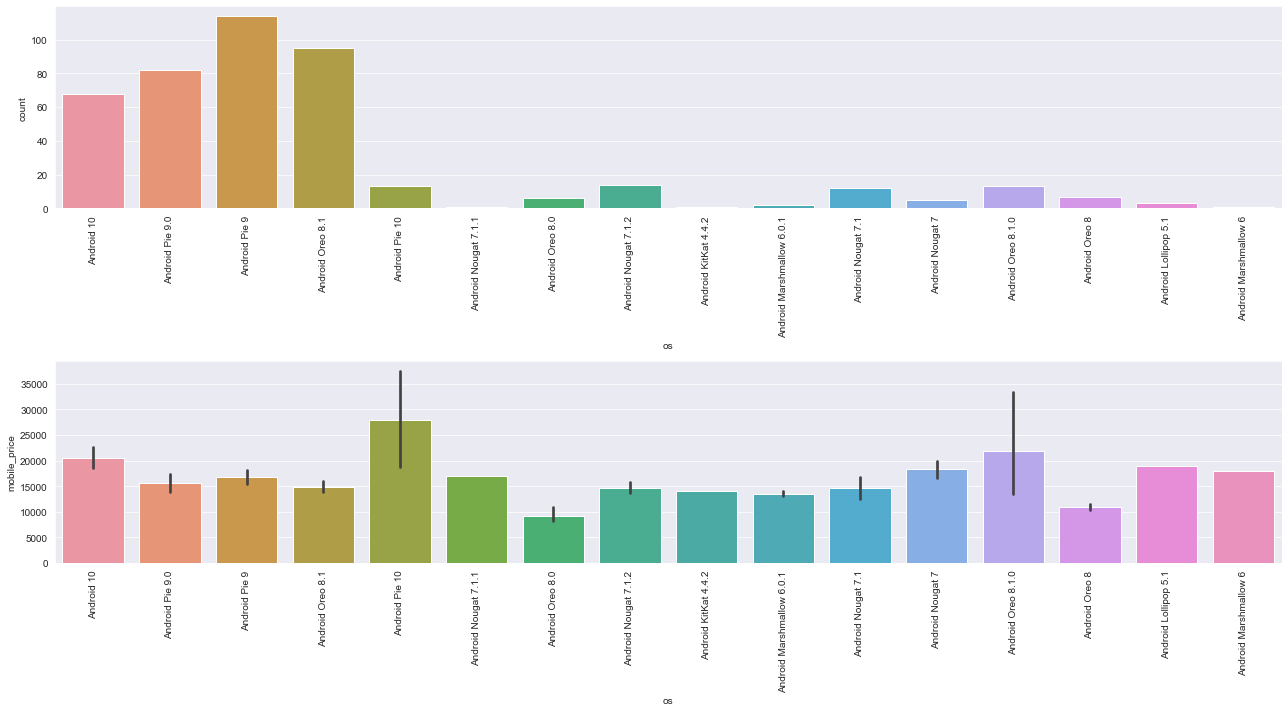

In [79]:
#checking the os column
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
sns.countplot(data=df,x="os")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(data=df,x="os",y="mobile_price")
plt.xticks(rotation=90)
plt.tight_layout()

#counts wise the top three os doesnot have high daviation on the price 
#where as in case of os such as 'android pie 10' and 'android oreo 8.1.0' the have very less count but the price daviation is very high. 

In [81]:
df.head(3)

,brand,mobile_color,os,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,mobile_price,mp_speed,int_memory,ram
0,Realme,So White,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3
1,Realme,So Blue,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3
2,Realme,So Blue,Android 10,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0,16.56,8,9999,2.0,64,4


In [ ]:
#converting the categorical col to cat codes

In [84]:
df['color_cat'] = df["mobile_color"].astype("category").cat.codes

In [88]:
df["brand_cat"] = df["brand"].astype("category").cat.codes

In [89]:
df["os_cat"] = df["os"].astype("category").cat.codes

In [90]:
df["p_cam"] = df["p_cam"].astype("category").cat.codes

In [91]:
df["f_cam"] = df["f_cam"].astype("category").cat.codes

In [92]:
df["network"] = df["network"].astype("category").cat.codes

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          437 non-null    object 
 1   mobile_color   437 non-null    object 
 2   os             437 non-null    object 
 3   p_cam          437 non-null    int8   
 4   f_cam          437 non-null    int8   
 5   network        437 non-null    int8   
 6   battery_power  437 non-null    int32  
 7   mob_width      437 non-null    float64
 8   mob_height     437 non-null    float64
 9   mob_depth      437 non-null    float64
 10  mob_weight     437 non-null    float64
 11  disp_size_cm   437 non-null    float64
 12  core           437 non-null    int64  
 13  mobile_price   437 non-null    int32  
 14  mp_speed       437 non-null    float64
 15  int_memory     437 non-null    int32  
 16  ram            437 non-null    int32  
 17  color_cat      437 non-null    int16  
 18  brand_cat 

In [96]:
#droping the categorical values
data = df.drop(['brand','mobile_color','os'],axis = 1)

In [98]:
data.head()

,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,mobile_price,mp_speed,int_memory,ram,color_cat,brand_cat,os_cat
0,4,12,12,5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3,130,4,0
1,4,12,12,5000,75.0,164.4,8.95,195.0,16.56,8,8999,2.0,32,3,129,4,0
2,4,12,12,5000,75.0,164.4,8.95,195.0,16.56,8,9999,2.0,64,4,129,4,0
3,4,12,12,5000,75.0,164.4,8.95,195.0,16.56,8,9999,2.0,64,4,130,4,0
4,35,3,12,5000,75.4,164.4,9.00,199.0,16.51,8,11999,2.0,128,4,146,4,0


In [100]:
data.columns

Index(['p_cam', 'f_cam', 'network', 'battery_power', 'mob_width', 'mob_height',
       'mob_depth', 'mob_weight', 'disp_size_cm', 'core', 'mobile_price',
       'mp_speed', 'int_memory', 'ram', 'color_cat', 'brand_cat', 'os_cat'],
      dtype='object')

In [114]:
#data preprocessing on the numerical features
from sklearn.preprocessing import StandardScaler

In [115]:
scale = StandardScaler()

In [125]:
#scaling the data
data[['battery_power', 'mob_width', 'mob_height','mob_depth', 'mob_weight', 'disp_size_cm', 'core','mp_speed', 'int_memory', 'ram']] = scale.fit_transform(data[['battery_power', 'mob_width', 'mob_height','mob_depth', 'mob_weight', 'disp_size_cm', 'core','mp_speed', 'int_memory', 'ram']])

In [126]:
data.head()

,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm,core,mobile_price,mp_speed,int_memory,ram,color_cat,brand_cat,os_cat
0,4,12,12,1.483946,-0.231467,1.328739,0.876055,0.814754,0.808705,0.153033,8999,-0.37408,-0.873741,-0.947584,130,4,0
1,4,12,12,1.483946,-0.231467,1.328739,0.876055,0.814754,0.808705,0.153033,8999,-0.37408,-0.873741,-0.947584,129,4,0
2,4,12,12,1.483946,-0.231467,1.328739,0.876055,0.814754,0.808705,0.153033,9999,-0.37408,-0.383908,-0.465518,129,4,0
3,4,12,12,1.483946,-0.231467,1.328739,0.876055,0.814754,0.808705,0.153033,9999,-0.37408,-0.383908,-0.465518,130,4,0
4,35,3,12,1.483946,0.066518,1.328739,0.970864,1.039220,0.742751,0.153033,11999,-0.37408,0.595758,-0.465518,146,4,0


In [131]:
from sklearn.model_selection import train_test_split

In [135]:
#storing the values
x = data[['battery_power', 'mob_width', 'mob_height','mob_depth', 'mob_weight', 'disp_size_cm', 'core','mp_speed', 'int_memory', 'ram']]
y = df["mobile_price"]

In [136]:
#splitng the columns
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 29)

In [132]:
from sklearn.linear_model import LinearRegression

In [137]:
#implementing the Linear Regression model
lm = LinearRegression()

In [138]:
#fitting the values in Linear regresion model
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
#predictng the values on both the train and test data
train_pred = lm.predict(xtrain)
test_pred = lm.predict(xtest)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
# Evaluation of model witht only numerical features
train_rmse = np.sqrt(mean_squared_error(ytrain,train_pred))
train_r2 = r2_score(ytrain,train_pred)

test_rmse = np.sqrt(mean_squared_error(ytest,test_pred))
test_r2 = r2_score(ytest,test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R2: {test_r2}")

Training RMSE: 4553.280456133978
Training R2: 0.7123817702178403
Testing RMSE: 5336.915789126213
Testing R2: 0.7063416931679807


In [143]:
data["mobile_price"].describe()

count      437.000000
mean     16914.185355
std       8792.164551
min       6499.000000
25%      10999.000000
50%      14990.000000
75%      18990.000000
max      60990.000000
Name: mobile_price, dtype: float64

In [145]:
x = data.drop("mobile_price",axis = 1)
y = data["mobile_price"]

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 29)

In [154]:
lm = LinearRegression()

In [155]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
train_pred = lm.predict(xtrain)
test_pred = lm.predict(xtest)

In [157]:
# Evaluation of model with all the features involved
train_rmse = np.sqrt(mean_squared_error(ytrain,train_pred))
train_r2 = r2_score(ytrain,train_pred)

test_rmse = np.sqrt(mean_squared_error(ytest,test_pred))
test_r2 = r2_score(ytest,test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R2: {test_r2}")

Training RMSE: 4428.054601933572
Training R2: 0.7279845690052792
Testing RMSE: 5343.139324120177
Testing R2: 0.7056564065994795


In [158]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 109)

In [159]:
lm = LinearRegression()

In [160]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
train_pred = lm.predict(xtrain)
test_pred = lm.predict(xtest)

In [162]:
# evaluation of model after changing the random_state
train_rmse = np.sqrt(mean_squared_error(ytrain,train_pred))
train_r2 = r2_score(ytrain,train_pred)

test_rmse = np.sqrt(mean_squared_error(ytest,test_pred))
test_r2 = r2_score(ytest,test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R2: {test_r2}")

Training RMSE: 4544.6221646004615
Training R2: 0.7264705307901573
Testing RMSE: 4795.0278595125055
Testing R2: 0.7234571480836774
